# ch 15_7 Ridge, Lasso Regression

이전 챕터에서 다중 선형 회귀 모델에 대해서 배웠습니다. 그리고 이 때, 다중 공선성 문제가 발생할 수 있다고 배웠습니다. 이를 해결하기 위해서 ridge regression이나 lasso regression을 사용할 수 있었습니다. 이번 챕터에서는 각각이 어떤 개념인지, 실제 사용은 어떻게 할 수 있는지 알아보겠습니다.

## Regularization

ridge와 lasso를 이해하려면 먼저 regularization을 이해해야 합니다. 데이터 셋이 주어졌을 때, 모델이 데이터 셋을 충분히 설명하지 못하는 것을 underfitting, 지나치게 과적합 되는 것을 overfitting이라고 부릅니다. 

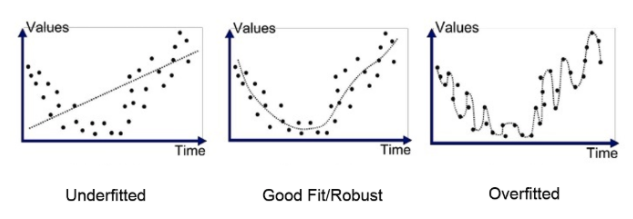

under fitted 모델을 보면 기울기 값 하나로 예측모델을 만들었습니다. 그런데 실제 데이터는 이보다 복잡하므로 모델의 오차가 큽니다. 반면 overfitted 모델을 보면 데이터 셋에 지나치게 적합한 형태를 보여줍니다. 이는 학습용 데이터 셋에 대해선 뛰어난 성능을 보여주겠지만, 일반적으로 적용할 수는 없습니다.  우리가 원하는 것은 일반적으로 적용할 수 있는 underfit 과 overfit 중간 지점에 위치한 모델을 찾는 것입니다.

Regularization은 모델의 복잡성을 줄여주어 오버피팅을 방지하는 기법입니다. lasso와 ridge regression은 multiple linear regression 모델에 회귀 계수의 크기를 제한하는 페널티를 부여하여 regularization을 적용한 모델입니다.

## 다중 선형 회귀

다중 선형 회귀의 최소제곱법의 수식은 아래와 같습니다. 오차의 제곱을 최소화하는 회귀 계수를 추정하는 식입니다.

$$(b_{0},b_{1}, ..., b_{k})=argmin\sum_{i=1}^{n}\epsilon_{i}^2=argmin\sum_{i=1}^{n}(y_{i}-\beta_{0}-\sum_{j=1}^{k}\beta_{j}x_{ij})^2$$

## Lasso Regression

Lasso regression은 여기에 정규화를 위해서 회귀 계수들의 절대값의 합을 더해줍니다. 이를 L1 regularization이라고도 부릅니다. λ는 정규화를 얼마나 크게 적용할지 조정하는 파라미터입니다.

$$(b_{0},b_{1}, ..., b_{k})=argmin\sum_{i=1}^{n}(y_{i}-\beta_{0}-\sum_{j=1}^{k}\beta_{j}x_{ij})^2+\lambda \sum_{j=1}^{k}|\beta_{j}|$$

## Ridge Regression

Ridge regression은 정규화를 위해서 회귀 계수들의 제곱 합을 더해줍니다. 이를 L2 regularization이라고도 부릅니다. 그 외의 부분은 Lasso regression과 동일합니다. 

$$(b_{0},b_{1}, ..., b_{k})=argmin\sum_{i=1}^{n}(y_{i}-\beta_{0}-\sum_{j=1}^{k}\beta_{j}x_{ij})^2+\lambda \sum_{j=1}^{k}\beta_{j}^2$$

## Regularization의 효과

Lasso와 Ridge는 각각 다중 선형 회귀에 L1, L2 regularization을 적용한 모델입니다. 최소 제곱법 수식에 회귀 계수들의 절대값의 합, 제곱합을 더해주는게 어떤 효과가 있을까요?

오차의 제곱합과 회귀 계수들의 절대 값의 합 (L1), 혹은 제곱한 값들의 합(L2)이 최소가 되도록 회귀식을 도출하면 회귀 계수들의 크기는 작게 유지하면서 오차를 최소화 하는 회귀식이 도출됩니다. 즉, 지나치게 구불구불 거리는 회귀식이 아니라 쫙쫙 펴져있어서 일반적으로 적용하기 적합한 모델을 얻을 수 있는 것입니다.

In [2]:
from utils import load_house_dataset
import numpy as np

x_train, x_test, y_train, y_test = load_house_dataset()
columns = ["sqft_living", "floors", "yr_sold_built", "view", "sqft_lot15", "waterfront"]
x_train = x_train[columns]
x_test = x_test[columns]

In [9]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

models = [
    ("multiple linear regression", LinearRegression()),
    ("lasso regression", Lasso(alpha=100)),
    ("ridge regression", Ridge(alpha=100)),
]

In [10]:
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print(name)
    print("test r2:", r2_score(y_test, y_pred))
    print("test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("sum of abs coefficient:", np.abs(model.coef_).sum())
    print("")

multiple linear regression
test r2: 0.5824149041006753
test RMSE: 249401.27063220783
sum of abs coefficient: 716024.8736671354

lasso regression
test r2: 0.5824692006127923
test RMSE: 249385.05590201056
sum of abs coefficient: 700662.582041614

ridge regression
test r2: 0.5799707968982313
test RMSE: 250130.0731104905
sum of abs coefficient: 451053.967594957



## 정리

이번 챕터에서는 모델의 오버피팅을 방지하는 regularization의 개념에 대해서 알아보았습니다. 그리고 다중 선형 회귀 모델에 L1 regularization을 적용한 Lasso, L2 regularization을 적용한 Ridge 모델에 대해서 알아보았습니다. 그리고 실제 데이터 셋으로 각각의 모델을 학습시켜 보았습니다.